In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv("heart_Disease.csv")

In [33]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

## Визуелизации

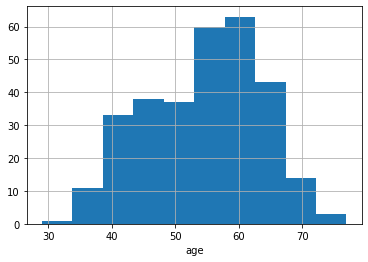

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


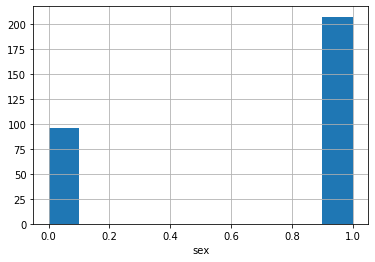

count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64


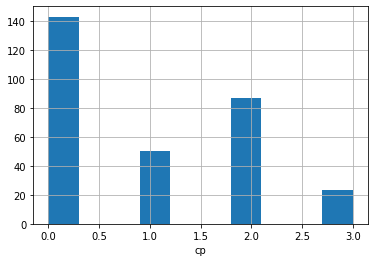

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64


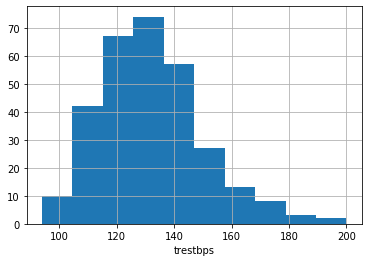

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


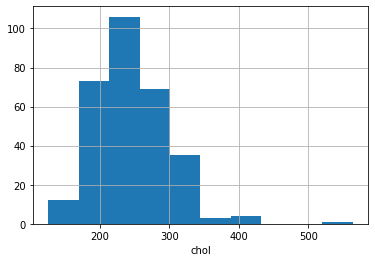

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


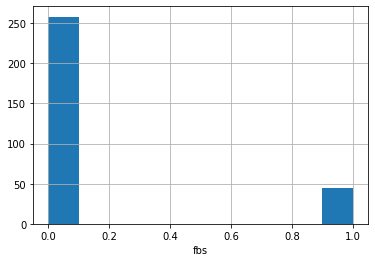

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64


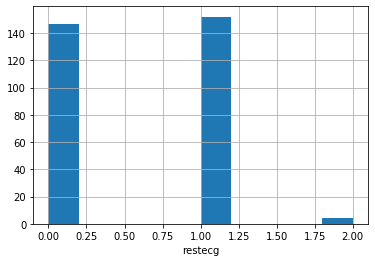

count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64


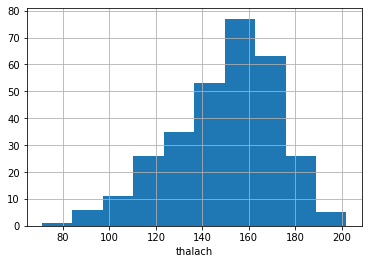

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


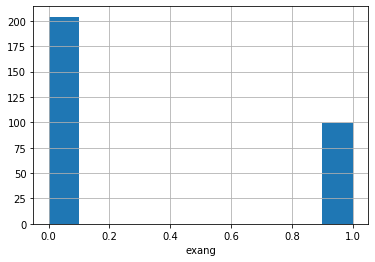

count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64


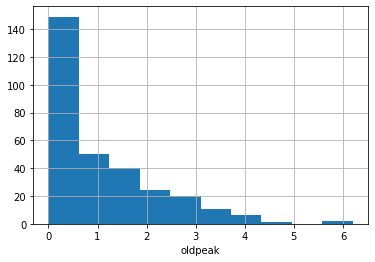

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


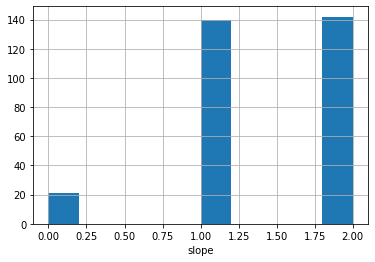

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64


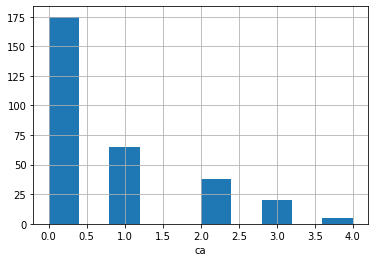

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64


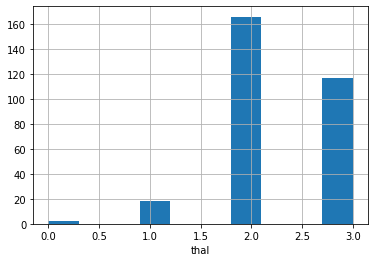

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64


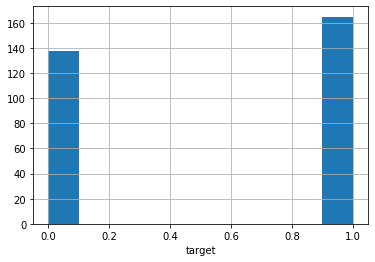

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64


In [34]:
for column in df.columns:
    df[column].hist()
    plt.xlabel(column)
    plt.show()
    print(df[column].describe())

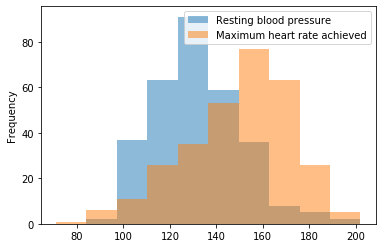

In [35]:
df[['trestbps','thalach']].plot.hist(alpha=0.5)
plt.legend(["Resting blood pressure","Maximum heart rate achieved"])

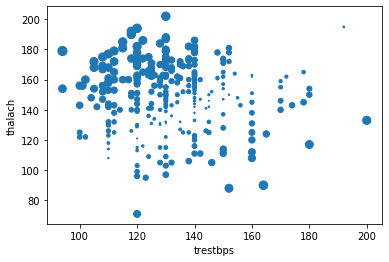

In [36]:
df.plot.scatter(x='trestbps',y='thalach',s=np.abs(df['trestbps']-df['thalach']))

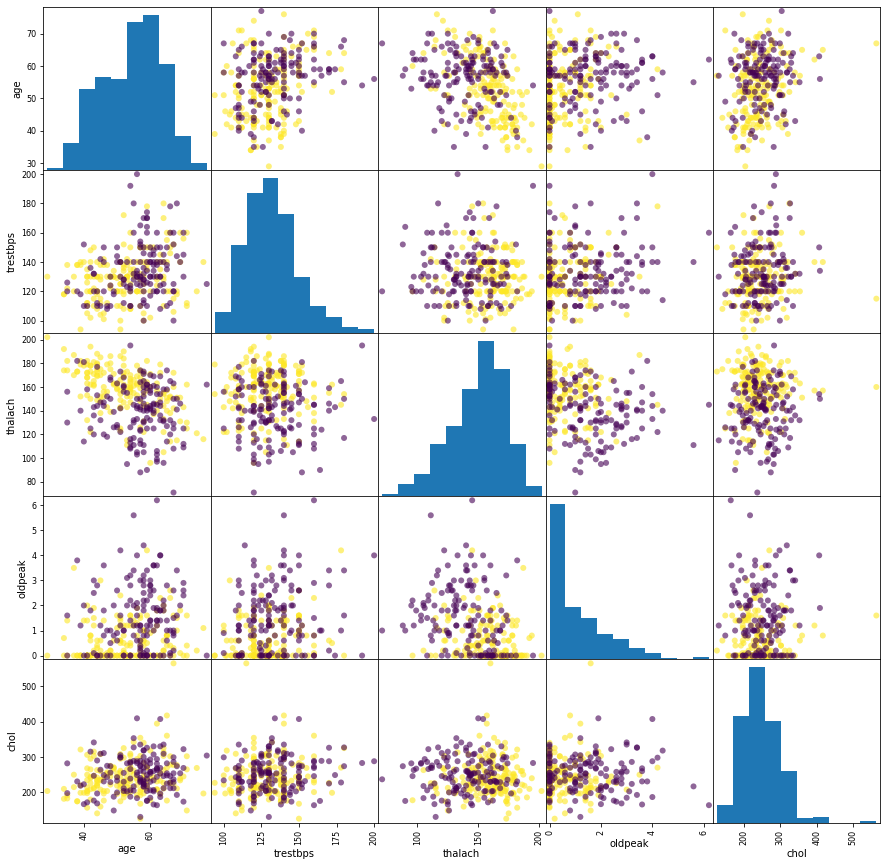

In [37]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['age','trestbps','thalach','oldpeak','chol']], c=df['target'],marker='o',alpha=.6,figsize  = [15, 15])
plt.show()

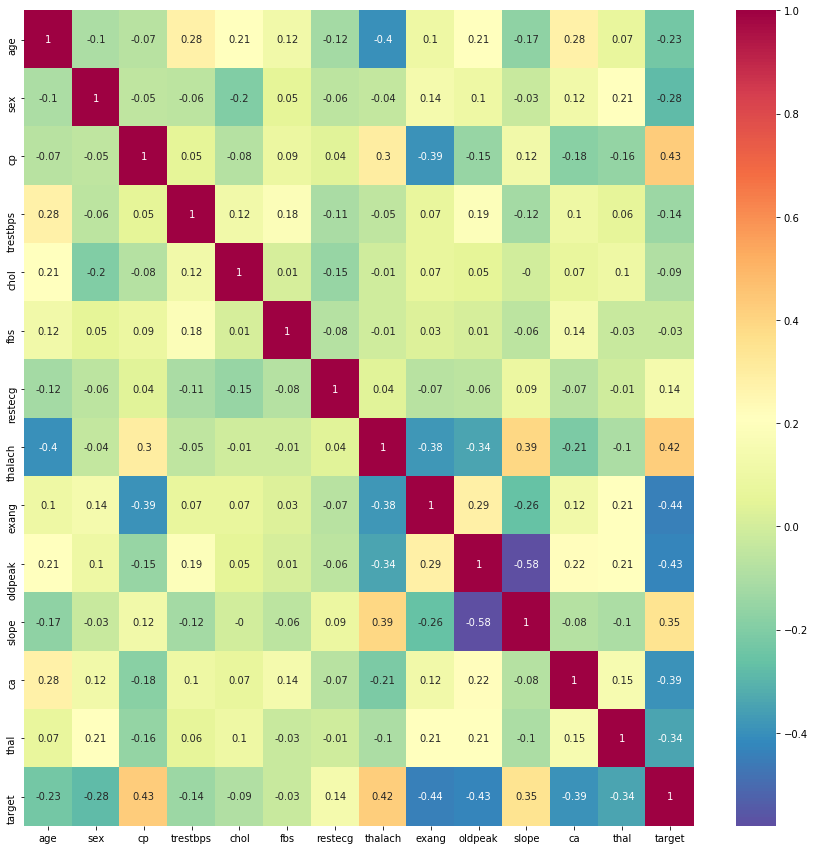

In [38]:
import seaborn as sns

cormat = df.corr()
cormat = round(cormat,2)
plt.figure(figsize=(15,15))
sns.heatmap(cormat, cmap='Spectral_r', annot=True)

## Oтстранување outliers

In [39]:
from scipy import stats
df_copy = df.copy()
df_copy[(np.abs(stats.zscore(df_copy)) < 3).all(axis=1)]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[287 rows x 14 columns]

In [40]:
df_copy = np.array(df_copy)
array = np.abs(stats.zscore(df_copy)) < 3
removed_rows = []
index=[]
for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j]==False:
            removed_rows.append(np.append(df_copy[i],df_copy[i][j]))
            index.append(i)
            break
removed_rows=pd.DataFrame(removed_rows)
removed_rows.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target','cause of removal']
removed_rows

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   65.0  0.0  2.0     140.0  417.0  1.0      0.0    157.0    0.0      0.8   
1   53.0  0.0  2.0     128.0  216.0  0.0      0.0    115.0    0.0      0.0   
2   67.0  0.0  2.0     115.0  564.0  0.0      0.0    160.0    0.0      1.6   
3   52.0  1.0  2.0     138.0  223.0  0.0      1.0    169.0    0.0      0.0   
4   58.0  1.0  1.0     125.0  220.0  0.0      1.0    144.0    0.0      0.4   
5   38.0  1.0  2.0     138.0  175.0  0.0      1.0    173.0    0.0      0.0   
6   38.0  1.0  2.0     138.0  175.0  0.0      1.0    173.0    0.0      0.0   
7   62.0  0.0  0.0     160.0  164.0  0.0      0.0    145.0    0.0      6.2   
8   63.0  0.0  0.0     150.0  407.0  0.0      0.0    154.0    0.0      4.0   
9   55.0  1.0  0.0     140.0  217.0  0.0      1.0    111.0    1.0      5.6   
10  56.0  0.0  0.0     200.0  288.0  1.0      0.0    133.0    1.0      4.0   
11  56.0  0.0  0.0     134.0  409.0  0.0      0.0    150.0    1.0      1.9   
12  54.0  1.0  1.0     192.0  283.0  0.0      0.0    195.0    0.0      0.0   
13  43.0  1.0  0.0     132.0  247.0  1.0      0.0    143.0    1.0      0.1   
14  67.0  1.0  0.0     120.0  237.0  0.0      1.0     71.0    0.0      1.0   
15  52.0  1.0  0.0     128.0  204.0  1.0      1.0    156.0    1.0      1.0   

    slope   ca  thal  target  cause of removal  
0     2.0  1.0   2.0     1.0             417.0  
1     2.0  0.0   0.0     1.0               0.0  
2     1.0  0.0   3.0     1.0             564.0  
3     2.0  4.0   2.0     1.0               4.0  
4     1.0  4.0   3.0     1.0               4.0  
5     2.0  4.0   2.0     1.0               4.0  
6     2.0  4.0   2.0     1.0               4.0  
7     0.0  3.0   3.0     0.0               6.2  
8     1.0  3.0   3.0     0.0             407.0  
9     0.0  0.0   3.0     0.0               5.6  
10    0.0  2.0   3.0     0.0             200.0  
11    1.0  2.0   3.0     0.0             409.0  
12    2.0  1.0   3.0     0.0             192.0  
13    1.0  4.0   3.0     0.0               4.0  
14    1.0  0.0   2.0     0.0              71.0  
15    1.0  0.0   0.0     0.0               0.0

In [41]:
df=df.drop(df.index[index])

In [42]:
missing_values_train = df.isnull().sum()
percentage_train = 100 * df.isnull().sum() / len(df)
missing_values_table_train = pd.concat([missing_values_train, percentage_train], axis=1)
missing_values_table_train.columns = ['Num. of missing values','% of missing values']
missing_values_table_train

Num. of missing values  % of missing values
age                            0                  0.0
sex                            0                  0.0
cp                             0                  0.0
trestbps                       0                  0.0
chol                           0                  0.0
fbs                            0                  0.0
restecg                        0                  0.0
thalach                        0                  0.0
exang                          0                  0.0
oldpeak                        0                  0.0
slope                          0                  0.0
ca                             0                  0.0
thal                           0                  0.0
target                         0                  0.0

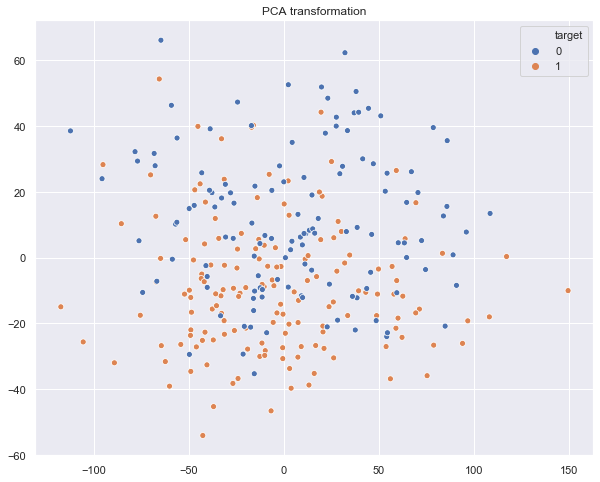

In [193]:
from sklearn.decomposition import PCA

pca = PCA(2)
df_pca = pca.fit_transform(df.drop(["target"],axis=1))
labels = df["target"]

plt.figure(figsize=(10,8))
sns.scatterplot(df_pca[:,0], df_pca[:,1],hue=labels)
plt.title("PCA transformation")
plt.show()

## Decision tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier

In [44]:
dataset = df.copy()
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop("target",axis=1),dataset["target"],test_size = 0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(229, 13) (58, 13) (229,) (58,)


In [45]:
dt1 = DecisionTreeClassifier(criterion="entropy",random_state=0)
dt2 = DecisionTreeClassifier(criterion="gini",random_state=0)

dt1.fit(X_train,Y_train)
dt2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

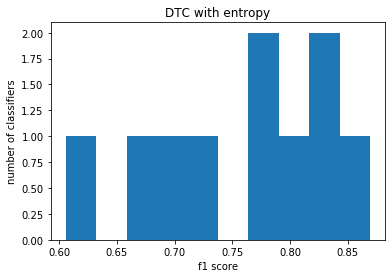

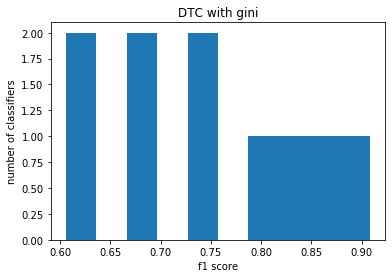

In [46]:
score_entropy = cross_val_score(dt1, X_train, Y_train, cv=10, scoring='f1_macro')
score_gini = cross_val_score(dt2, X_train, Y_train, cv=10, scoring='f1_macro')
plt.hist(score_entropy)
plt.xlabel("f1 score")
plt.ylabel("number of classifiers")
plt.title("DTC with entropy")
plt.show()
plt.hist(score_gini)
plt.xlabel("f1 score")
plt.ylabel("number of classifiers")
plt.title("DTC with gini")
plt.show()


In [47]:
y_pred_entropy = dt1.predict(X_test)
y_pred_gini = dt2.predict(X_test)

In [48]:
print("DTC with entropy precision: ", precision_score(y_pred_entropy,Y_test))
print("DTC with entropy accuracy: ", accuracy_score(y_pred_entropy,Y_test))
print("DTC with gini precision: ", precision_score(y_pred_gini,Y_test))
print("DTC with gini accuracy: ", accuracy_score(y_pred_gini,Y_test))

DTC with entropy precision:  0.7142857142857143
DTC with entropy accuracy:  0.7241379310344828
DTC with gini precision:  0.75
DTC with gini accuracy:  0.7413793103448276


In [49]:
prune = dt1.cost_complexity_pruning_path(X_train, Y_train)
alphas = prune["ccp_alphas"]

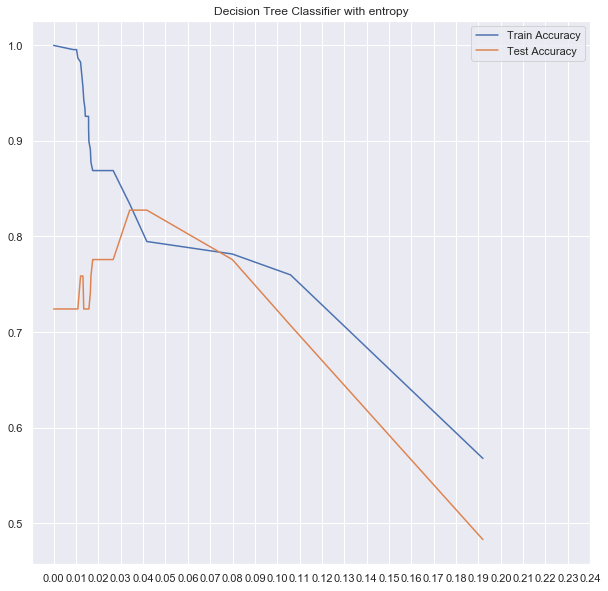

In [50]:
import seaborn as sns

training_score, testing_score = [],[]
for i in alphas:
    tree = DecisionTreeClassifier(criterion="entropy",ccp_alpha=i,random_state=0)
    
    tree.fit(X_train, Y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    training_score.append(accuracy_score(y_train_pred,Y_train))
    testing_score.append(accuracy_score(y_test_pred,Y_test))

sns.set()
plt.figure(figsize=(10,10))
sns.lineplot(x=alphas, y=training_score, label="Train Accuracy")
sns.lineplot(x=alphas, y=testing_score, label="Test Accuracy")
plt.title("Decision Tree Classifier with entropy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [51]:
prune = dt2.cost_complexity_pruning_path(X_train, Y_train)
alphas = prune["ccp_alphas"]

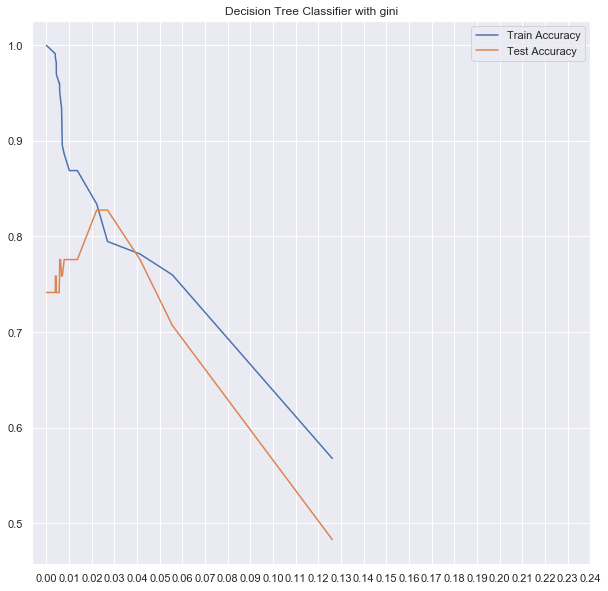

In [52]:
import seaborn as sns

training_score, testing_score = [],[]
for i in alphas:
    tree = DecisionTreeClassifier(criterion="gini",ccp_alpha=i,random_state=0)
    
    tree.fit(X_train, Y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    training_score.append(accuracy_score(y_train_pred,Y_train))
    testing_score.append(accuracy_score(y_test_pred,Y_test))

sns.set()
plt.figure(figsize=(10,10))
sns.lineplot(x=alphas, y=training_score, label="Train Accuracy")
sns.lineplot(x=alphas, y=testing_score, label="Test Accuracy")
plt.title("Decision Tree Classifier with gini")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [53]:
best_entropy_tree = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.045,random_state=0)
best_gini_tree = DecisionTreeClassifier(criterion="gini",ccp_alpha=0.025,random_state=0)

best_entropy_tree.fit(X_train, Y_train)
best_gini_tree.fit(X_train, Y_train)

y_pred_entropy = best_entropy_tree.predict(X_test)
y_pred_gini = best_gini_tree.predict(X_test)

print("DTC with entropy precision: ", precision_score(y_pred_entropy,Y_test))
print("DTC with entropy accuracy: ", accuracy_score(y_pred_entropy,Y_test))
print("DTC with gini precision: ", precision_score(y_pred_gini,Y_test))
print("DTC with gini accuracy: ", accuracy_score(y_pred_gini,Y_test))

DTC with entropy precision:  0.8928571428571429
DTC with entropy accuracy:  0.8275862068965517
DTC with gini precision:  0.8214285714285714
DTC with gini accuracy:  0.8275862068965517


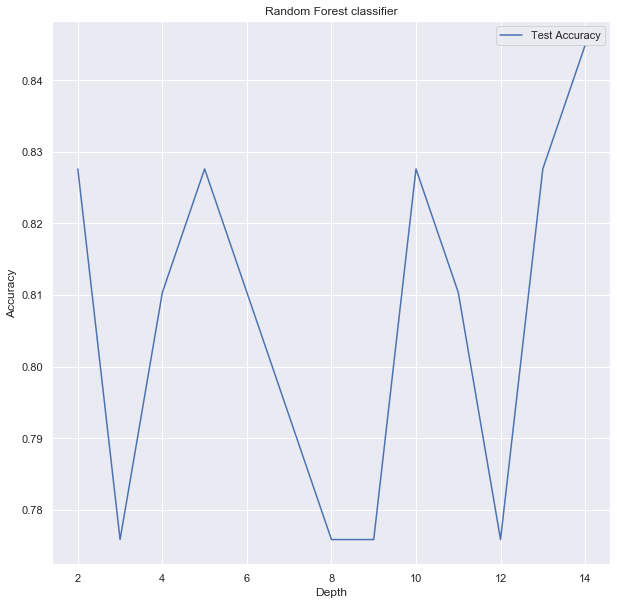

In [54]:
score = []

for i in range(2,15):
    forest = RandomForestClassifier(max_depth=i, max_samples=30)
    forest.fit(X_train, Y_train)
    y_pred = forest.predict(X_test)
    score.append(accuracy_score(y_pred,Y_test))
    
sns.set()
plt.figure(figsize=(10,10))
sns.lineplot(x=range(2,15), y=score, label="Test Accuracy")
plt.title("Random Forest classifier")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

## GaussianNB and CategoricalNB

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.decomposition import PCA

In [56]:
dataset = df.copy()
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["target"],axis=1),dataset["target"],test_size = 0.2,random_state=0)

In [57]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [58]:
y_pred = model.predict(X_test)

In [59]:
print("Accuracy score: ", accuracy_score(y_pred, Y_test))
print("Precision score: ", precision_score(y_pred, Y_test))

Accuracy score:  0.896551724137931
Precision score:  0.9310344827586207


In [60]:
dataset = df.copy(deep=True)
dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[287 rows x 14 columns]

chol: <150 (normal), >150 <200 (mildly high), >200 <500 (high), >500 (very high)
age: 18-39 (adult), 40-59 (middle aged), >60 (senior adult)
trestbps (Resting blood pressure, Systolic): <120 (normal), >120 <140 (elevated), >140 <160 (High blood pressure), >160 (Hypertension)
thalach (Maximum hearth rate): <120 normal, >120 <150 moderate, >150 high
oldpeak: removed

In [61]:
def change_chol(x):
    if x<150:
        return 1
    elif x>=150 and x<200:
        return 2
    elif x>=200 and x<500:
        return 3
    elif x>=500:
        return 4
        
def change_age(x):
    if x<40:
        return 1
    elif x>=40 and x<59:
        return 2
    elif x>=59:
        return 3
        
def change_trestbps(x):
    if x<120:
        return 1
    elif x>=120 and x<140:
        return 2
    elif x>=140 and x<160:
        return 3 
    elif x>=160:
        return 4
        
def change_thalach(x):
    if x<120:
        return 1
    elif x>=120 and x<150:
        return 2
    elif x>=150:
        return 3

dataset["chol"] = dataset["chol"].apply(change_chol)
dataset["age"] = dataset["age"].apply(change_age)
dataset["trestbps"] = dataset["trestbps"].apply(change_trestbps)
dataset["thalach"] = dataset["thalach"].apply(change_thalach)
dataset = dataset.drop(["oldpeak"], axis=1)
dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  slope  ca  \
0      3    1   3         3     3    1        0        3      0      0   0   
1      1    1   2         2     3    0        1        3      0      0   0   
2      2    0   1         2     3    0        0        3      0      2   0   
3      2    1   1         2     3    0        1        3      0      2   0   
4      2    0   0         2     3    0        1        3      1      2   0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...    ...  ..   
298    2    0   0         3     3    0        1        2      1      1   0   
299    2    1   3         1     3    0        1        2      0      1   0   
300    3    1   0         3     2    1        1        2      0      1   2   
301    2    1   0         2     1    0        1        1      1      1   1   
302    2    0   1         2     3    0        0        3      0      1   1   

     thal  target  
0       1       1  
1       2       1  
2       2       1  
3       2       1  
4       2       1  
..    ...     ...  
298     3       0  
299     3       0  
300     3       0  
301     3       0  
302     2       0  

[287 rows x 13 columns]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["target"],axis=1),dataset["target"],test_size = 0.2,random_state=0)

In [63]:
model = CategoricalNB()
model.fit(X_train,Y_train)

CategoricalNB()

In [64]:
y_pred = model.predict(X_test)
print("Accuracy score: ", accuracy_score(y_pred, Y_test))
print("Precision score: ", precision_score(y_pred, Y_test))

Accuracy score:  0.9137931034482759
Precision score:  0.896551724137931


Има мало подобрување на моделот користејќи CategoricalNB

In [65]:
dataset = df.copy()
X = dataset.drop(["target"],axis=1)
Y = dataset["target"]

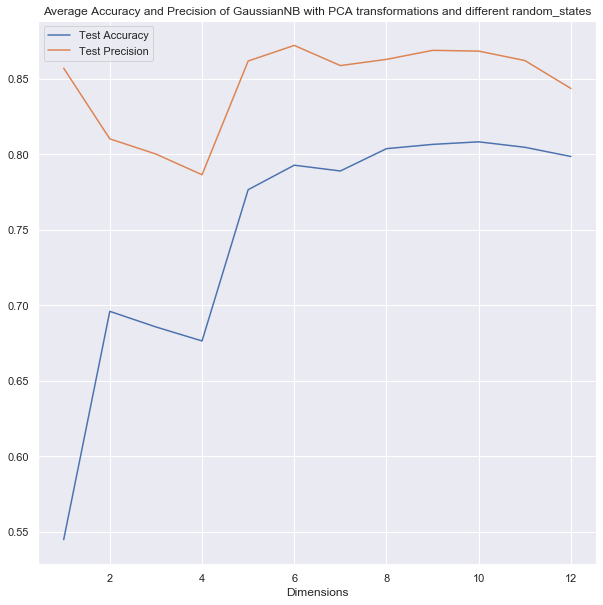

In [66]:
import statistics
avg_accuracy = []
avg_precision = []



dimensions = range(1,len(X.columns))

for dimension in dimensions:
    accuracy = []
    precision = []
    
    
    for random_state in range(150):
        X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state=random_state)
        
        pca = PCA(n_components=dimension)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)

        model = GaussianNB()
        model.fit(X_train_pca, Y_train)
        y_pred= model.predict(X_test_pca)

        accuracy.append(accuracy_score(y_pred,Y_test))
        precision.append(precision_score(y_pred, Y_test))
        
    avg_accuracy.append(statistics.mean(accuracy))
    avg_precision.append(statistics.mean(precision))

    
sns.set()
plt.figure(figsize=(10,10))
sns.lineplot(x=dimensions, y=avg_accuracy, label="Test Accuracy")
sns.lineplot(x=dimensions, y=avg_precision, label="Test Precision")
plt.title("Average Accuracy and Precision of GaussianNB with PCA transformations and different random_states")
plt.xlabel("Dimensions")
plt.show()   

За подобри перформанси на PCA, n_components >= 5

In [67]:
import plotly.express as px

pca = PCA(2)

df_tmp = pca.fit_transform(dataset.drop(["target"],axis=1))

df_tmp = pd.DataFrame(df_tmp)


fig = px.scatter_matrix(
    df_tmp,
    dimensions=df_tmp.columns,
    color=dataset["target"],
    title="Visualizing the dataset in 2D with PCA"
)
fig.show()  


## KNeighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
dataset = df.copy()

In [70]:
from sklearn.preprocessing import StandardScaler

X = dataset.drop(["target"],axis=1)
Y = dataset["target"]

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

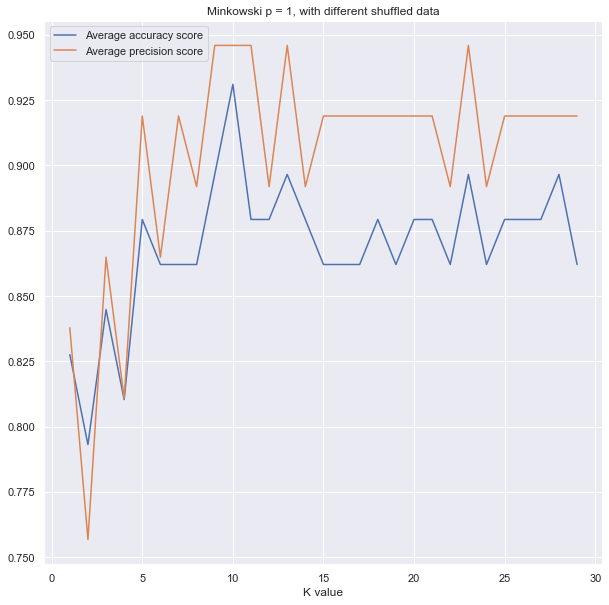

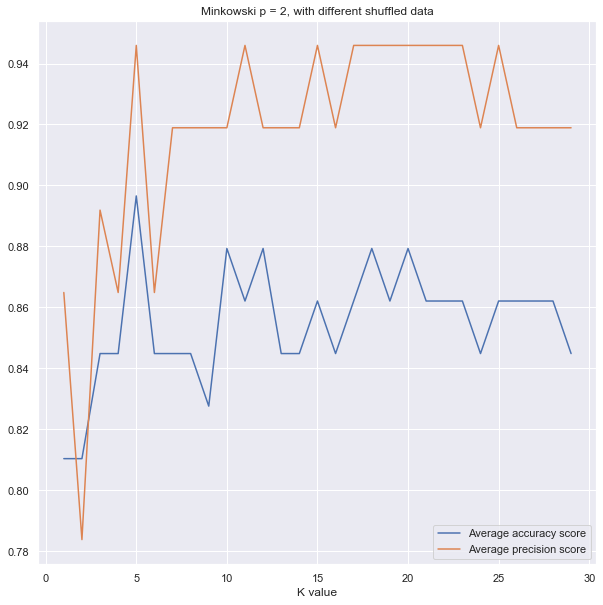

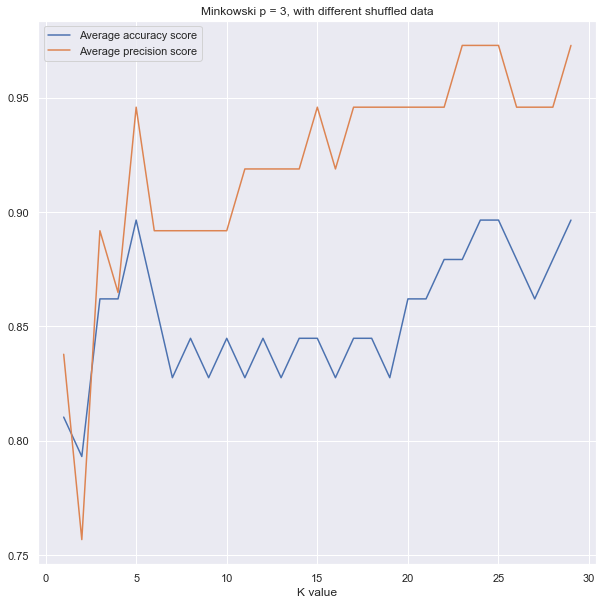

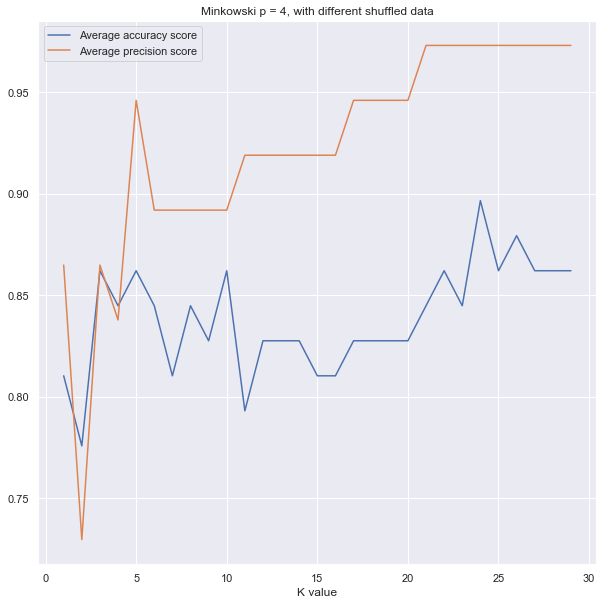

In [71]:
x = range(1,30)

for p in range(1,5):
    avg_accuracy = []
    avg_precision = []
    
    for k in x:
        for random_state in range(100):
            accuracy = []
            precision = []
            
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=random_state)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
            
            knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=p)

            knn.fit(X_train, Y_train)
            y_pred = knn.predict(X_test)

            accuracy.append(accuracy_score(y_pred, Y_test))
            precision.append(precision_score(y_pred, Y_test))
            
        avg_accuracy.append(np.mean(accuracy))
        avg_precision.append(np.mean(precision))
    %matplotlib inline
    plt.figure(figsize=(10,10))
    plt.plot(x, avg_accuracy, label="Average accuracy score")
    plt.plot(x, avg_precision, label="Average precision score")
    plt.legend()
    plt.title("Minkowski p = " + str(p) + ", with different shuffled data")
    plt.xlabel("K value")

    plt.show()

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=10, metric="minkowski", p=1)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_pred, Y_test))
print(confusion_matrix(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.95      0.95      0.95        37

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58

[[19  2]
 [ 2 35]]


Еден од подобрите модели е кога p=1 и n_neighbors = 10, резултатите се во просек земени со различна поделба на податочното множество (различни random_state променливи)

In [73]:
from sklearn.linear_model import LinearRegression

Предикција на холестерол атрибутот

In [160]:
dataset = df.copy(deep=True)
dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[287 rows x 14 columns]

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["chol"],axis=1), dataset["chol"],test_size=0.2, random_state=1)

## Линеарна регресија

In [162]:
from sklearn import metrics

model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error: ", metrics.mean_squared_error(y_pred, Y_test))
print("Mean absolute Error: ", metrics.mean_absolute_error(y_pred, Y_test))
print("Root Mean squared error: ", np.sqrt(metrics.mean_squared_error(y_pred, Y_test)))

Mean Squared Error:  2322.020694619865
Mean absolute Error:  38.153844251238475
Root Mean squared error:  48.187349943941356


In [163]:
model.coef_

array([  0.52944516, -22.37284416,  -2.09545498,   0.19682563,
        -2.16154553,  -8.92028249,   0.05447664,   1.68144364,
         0.91710884,   1.1337491 ,   1.28550781,   1.73737267,
        -9.43077243])

## Линеарна регресија со скалирање 

In [164]:
from sklearn.preprocessing import MinMaxScaler

column=list(dataset.columns)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns=column
dataset

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.593023  0.399254  1.0      0.0  0.543860   
1    0.166667  1.0  0.666667  0.418605  0.462687  0.0      0.5  0.868421   
2    0.250000  0.0  0.333333  0.418605  0.291045  0.0      0.0  0.736842   
3    0.562500  1.0  0.333333  0.302326  0.410448  0.0      0.5  0.789474   
4    0.583333  0.0  0.000000  0.302326  0.850746  0.0      0.5  0.657895   
..        ...  ...       ...       ...       ...  ...      ...       ...   
282  0.583333  0.0  0.000000  0.534884  0.429104  0.0      0.5  0.307018   
283  0.333333  1.0  1.000000  0.186047  0.514925  0.0      0.5  0.385965   
284  0.812500  1.0  0.000000  0.581395  0.250000  1.0      0.5  0.464912   
285  0.583333  1.0  0.000000  0.418605  0.018657  0.0      0.5  0.236842   
286  0.583333  0.0  0.333333  0.418605  0.410448  0.0      0.0  0.754386   

     exang   oldpeak  slope        ca  thal  target  
0      0.0  0.522727    0.0  0.000000   0.0     1.0  
1      0.0  0.795455    0.0  0.000000   0.5     1.0  
2      0.0  0.318182    1.0  0.000000   0.5     1.0  
3      0.0  0.181818    1.0  0.000000   0.5     1.0  
4      1.0  0.136364    1.0  0.000000   0.5     1.0  
..     ...       ...    ...       ...   ...     ...  
282    1.0  0.045455    0.5  0.000000   1.0     0.0  
283    0.0  0.272727    0.5  0.000000   1.0     0.0  
284    0.0  0.772727    0.5  0.666667   1.0     0.0  
285    1.0  0.272727    0.5  0.333333   1.0     0.0  
286    0.0  0.000000    0.5  0.333333   0.5     0.0  

[287 rows x 14 columns]

In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["chol"],axis=1), dataset["chol"],test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error: ", metrics.mean_squared_error(y_pred, Y_test))
print("Mean absolute Error: ", metrics.mean_absolute_error(y_pred, Y_test))
print("Root Mean squared error: ", np.sqrt(metrics.mean_squared_error(y_pred, Y_test)))
print("Coefficents: ", model.coef_)

Mean Squared Error:  0.032329314638837536
Mean absolute Error:  0.14236509048969584
Root Mean squared error:  0.17980354456694544
Coefficents:  [ 0.094826   -0.08348076 -0.02345659  0.06316046 -0.00806547 -0.06656927
  0.0231729   0.00627404  0.01505701  0.00846081  0.01439001  0.01296547
 -0.03518945]


## Полиномна регресија

In [166]:
dataset = df.copy(deep=True)
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["chol"],axis=1), dataset["chol"],test_size=0.2, random_state=1)

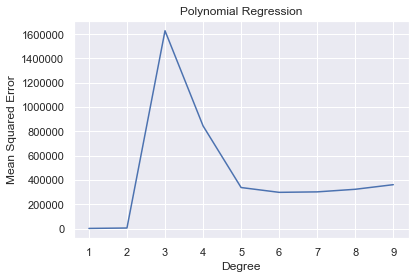

In [167]:
from sklearn.preprocessing import PolynomialFeatures

MSE = []
degrees = range(1,10)
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, Y_train)

    y_pred = pol_reg.predict(poly_reg.transform(X_test))
    MSE.append(metrics.mean_squared_error(y_pred,Y_test))

plt.plot(degrees, MSE)
plt.ylabel("Mean Squared Error")
plt.xlabel("Degree")
plt.title("Polynomial Regression")
plt.show()

## Полиномна регресија со скалирање

In [168]:
column=list(dataset.columns)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = pd.DataFrame(dataset)
dataset.columns=column

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["chol"],axis=1), dataset["chol"],test_size=0.2, random_state=1)

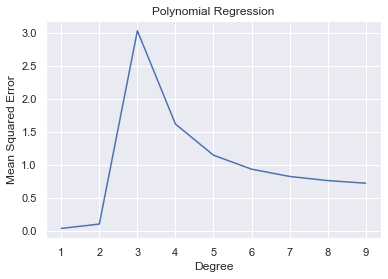

In [170]:
MSE = []
degrees = range(1,10)
for degree in degrees:
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, Y_train)

    y_pred = pol_reg.predict(poly_reg.transform(X_test))
    MSE.append(metrics.mean_squared_error(y_pred,Y_test))

plt.plot(degrees, MSE)
plt.ylabel("Mean Squared Error")
plt.xlabel("Degree")
plt.title("Polynomial Regression")
plt.show()

## Ridge регресија

In [174]:
dataset = df.copy(deep=True)
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["chol"],axis=1), dataset["chol"],test_size=0.2, random_state=1)

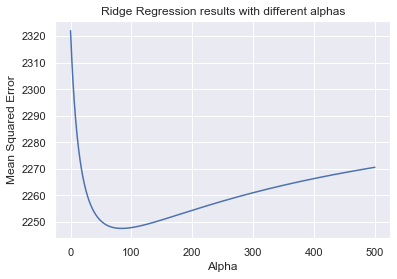

In [175]:
from sklearn.linear_model import Ridge


MSE = []
alphas = np.linspace(0, 500.0, num = 1500)
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    MSE.append(metrics.mean_squared_error(y_pred, Y_test))


plt.plot(alphas, MSE)
plt.ylabel("Mean Squared Error")
plt.xlabel("Alpha")
plt.title("Ridge Regression results with different alphas")
plt.show()

## Lasso регресија

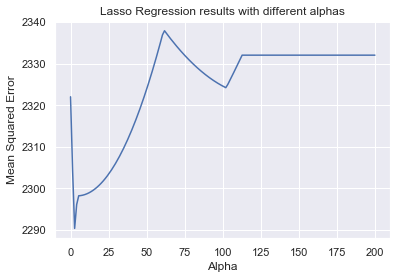

In [176]:
from sklearn.linear_model import Lasso

MSE = []
alphas = np.linspace(0, 200.0, num = 150)
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    MSE.append(metrics.mean_squared_error(y_pred, Y_test))


plt.plot(alphas, MSE)
plt.ylabel("Mean Squared Error")
plt.xlabel("Alpha")
plt.title("Lasso Regression results with different alphas")
plt.show()

## Ridge регресија со poly features

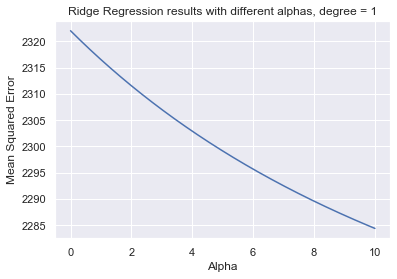

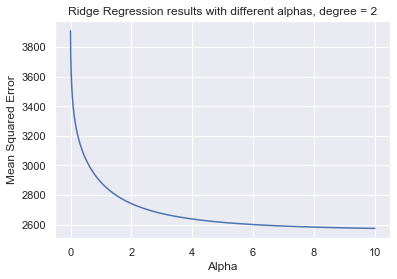

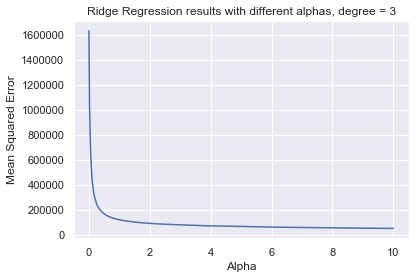

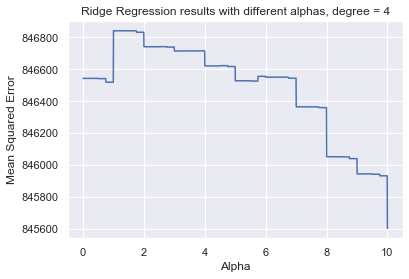

In [88]:
import warnings

warnings.filterwarnings('ignore')

X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop(["chol"],axis=1), dataset["chol"],test_size=0.2, random_state=1)

degrees = range(1,5)

for degree in degrees:
    
    MSE = []
    alphas = np.linspace(0, 10.0, num = 1500)
    
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X_train)
    
    for alpha in alphas:  
        pol_reg = Ridge(alpha=alpha)
        pol_reg.fit(X_poly, Y_train)
        y_pred = pol_reg.predict(poly_reg.transform(X_test))
        MSE.append(metrics.mean_squared_error(y_pred, Y_test))
    
    plt.plot(alphas, MSE)
    plt.ylabel("Mean Squared Error")
    plt.xlabel("Alpha")
    plt.title("Ridge Regression results with different alphas, degree = " + str(degree))
    plt.show()

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [90]:
dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[287 rows x 14 columns]

In [91]:
pos_class = dataset["target"].sum()
print("Positive classes: " + str(pos_class), "; Negative classes: " + str(len(dataset)-pos_class))

Positive classes: 158 ; Negative classes: 129


Податочното множество е релативно балансирано

In [92]:
dataset = df.copy(deep=True)
X = dataset.drop(["target"],axis=1)
Y = dataset["target"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

## Logistic regression

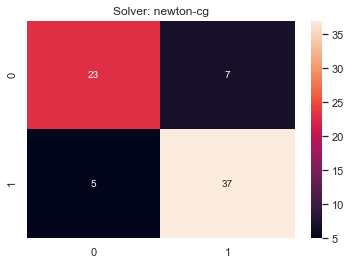

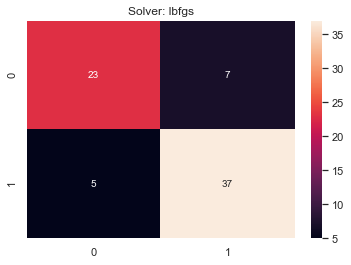

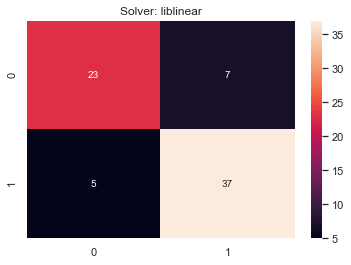

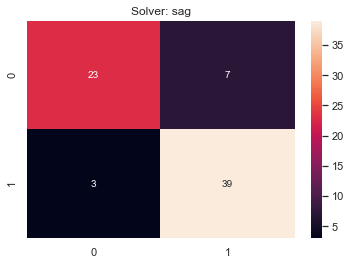

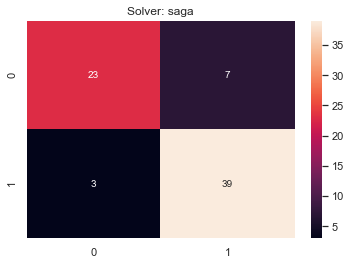

In [93]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=10000)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True)
    plt.title("Solver: " + solver)
    plt.show()

In [94]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

In [95]:
X = dataset.drop(["target"],axis=1)
Y = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

lda = LDA(solver="eigen")

lda.fit_transform(X_train, Y_train)

y_pred = lda.predict(X_test)

print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.91      0.89      0.90        45

    accuracy                           0.88        72
   macro avg       0.87      0.87      0.87        72
weighted avg       0.88      0.88      0.88        72



## LDA со балансирано множество

In [97]:
dataset.target.value_counts()

1    158
0    129
Name: target, dtype: int64

In [98]:
from sklearn.utils import resample

df_minority = df[df.target == 0]
df_majority = df[df.target == 1]

df_minority_upsampled = resample(df_minority, 
                                 n_samples=158-129,    
                                 random_state=5)

df_upsampled = pd.concat([df,df_minority_upsampled])

df_upsampled.target.value_counts()

1    158
0    158
Name: target, dtype: int64

In [99]:
X = df_upsampled.drop(["target"],axis=1)
Y = df_upsampled["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

lda = LDA(store_covariance=True)

lda.fit_transform(X_train, Y_train)

y_pred = lda.predict(X_test)

print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.90      0.88      0.89        41

    accuracy                           0.89        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.89      0.89      0.89        79



## Ensemble methods

In [101]:
from sklearn.ensemble import bagging, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [102]:
X = dataset.drop(["target"],axis=1)
Y = dataset["target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [103]:
lg = LogisticRegression(solver="sag", max_iter=10000)
rfc = RandomForestClassifier(max_depth=3, max_samples=10)
knc = KNeighborsClassifier(n_neighbors=10)

lg.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)
knc.fit(X_train, Y_train)

lg_pred = lg.predict(X_test)
rfc_pred = rfc.predict(X_test)
knc_pred = knc.predict(X_test)

avg_pred = (lg_pred + rfc_pred + knc_pred)//2
print(accuracy_score(avg_pred,Y_test))

0.896551724137931


In [104]:
result = []
for splits in range(1,20):
    for estimator in range(splits, 20):
        k_fold = KFold(n_splits=i)
        model = AdaBoostClassifier(n_estimators=estimator)
        result.append([splits,estimator,cross_val_score(model, X_train, Y_train, cv = k_fold).mean()])                     

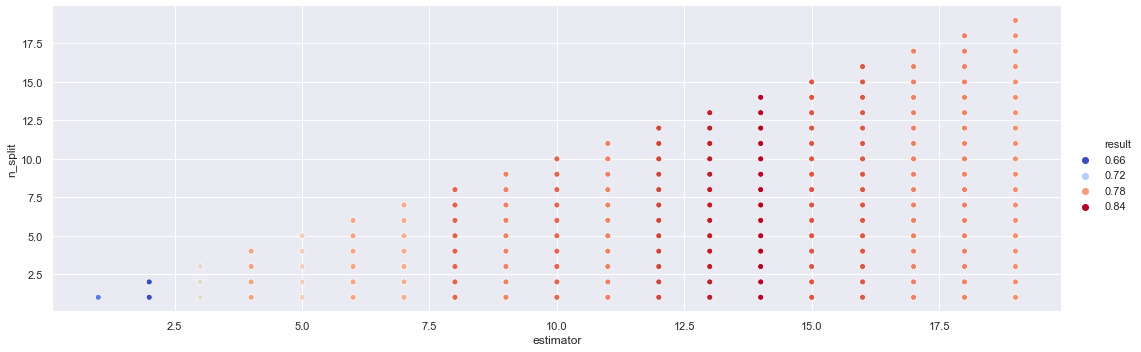

In [105]:
result = pd.DataFrame(result)

result.columns=["n_split","estimator","result"]

sns.relplot(x="estimator",y="n_split",hue="result", data=result, palette="coolwarm",aspect=3,height=5)

In [106]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

## KMeans

In [195]:
df_copy = dataset.copy(deep=True)
df_copy = df_copy.drop(["target"],axis=1)
labels = dataset["target"]

In [110]:
pca = PCA(2)
df_pca = pca.fit_transform(df_copy)

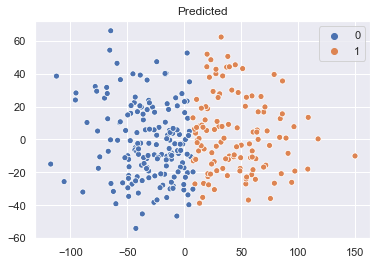

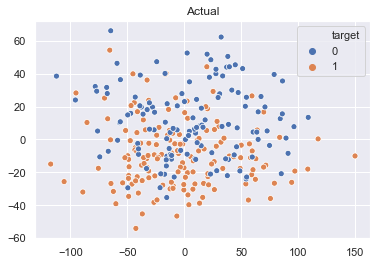

In [118]:
k_means = KMeans(n_clusters=2, max_iter=500, random_state=0)
k_means.fit(df_copy, labels)

predicted_labels = k_means.labels_
centroids = k_means.cluster_centers_

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=predicted_labels)
plt.title("Predicted")
plt.show()

sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=labels)
plt.title("Actual")
plt.show()

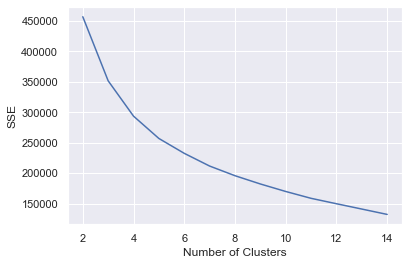

In [202]:
from sklearn.metrics import silhouette_score

SSE = []
silhouette_coefficients = []
for k in range(2, 15):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df_copy)
    SSE.append(k_means.inertia_)
    score = silhouette_score(df_copy, k_means.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(2, 15), SSE);
plt.xlabel('Number of Clusters');
plt.ylabel('SSE');

## AgglomerativeClustering

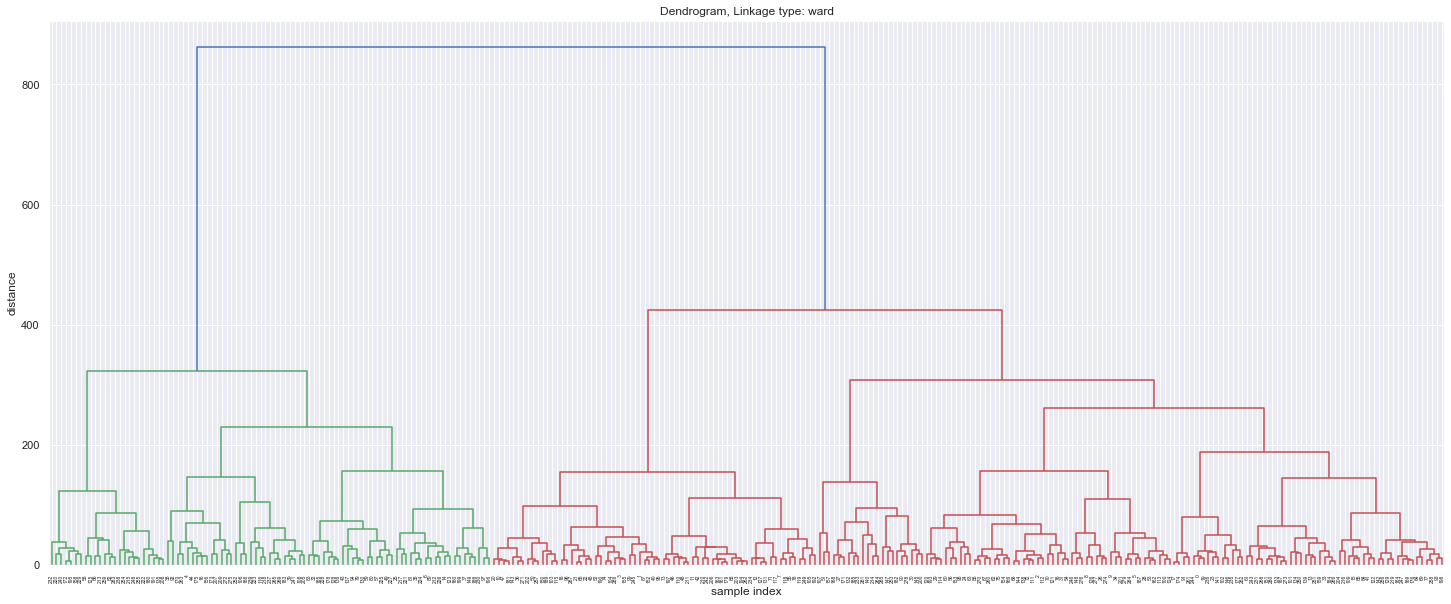

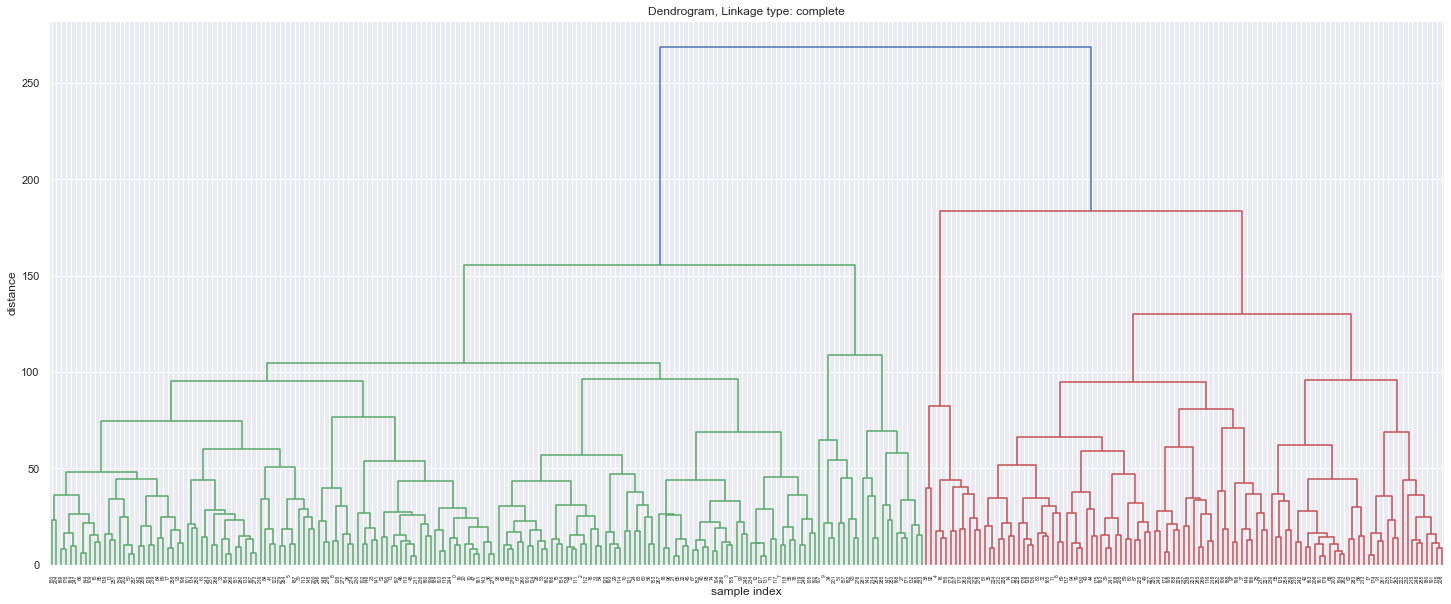

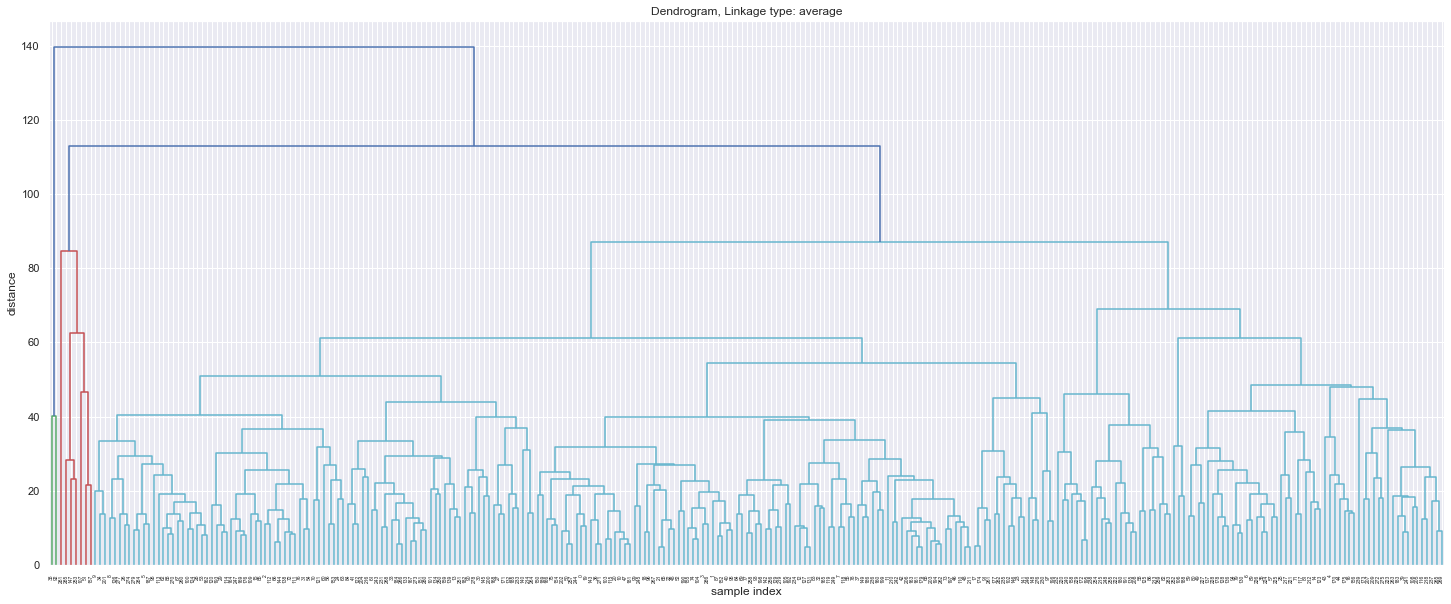

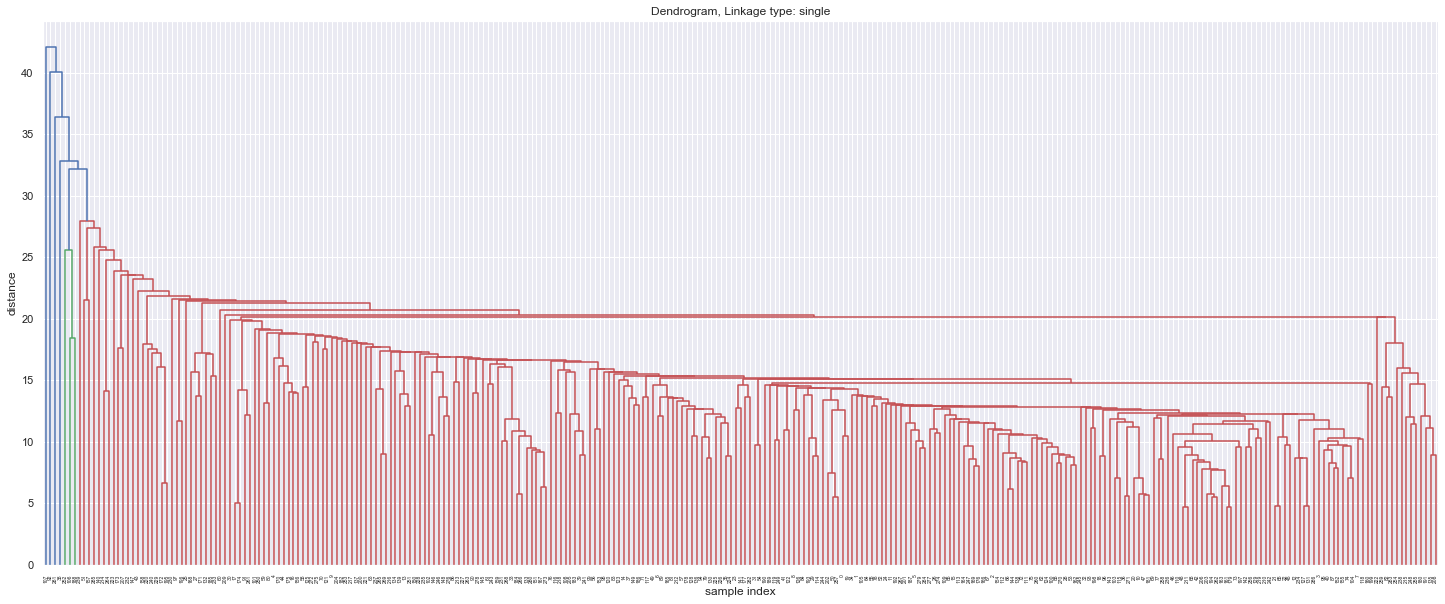

In [205]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
    Z = linkage(df_copy, link_type)
    
    plt.figure(figsize=(25, 10))
    plt.title('Dendrogram, Linkage type: ' + str(link_type))
    plt.xlabel('sample index')
    plt.ylabel('distance')
    
    dendrogram(Z, leaf_rotation=90.)

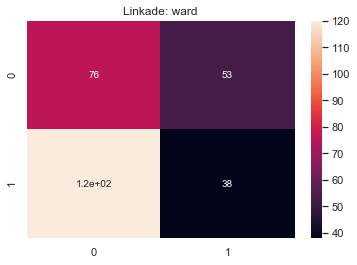

In [210]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(df_copy)

sns.heatmap(confusion_matrix(labels, clustering.labels_), annot=True)
plt.title("Linkade: ward")
plt.show()

## DBSCAN

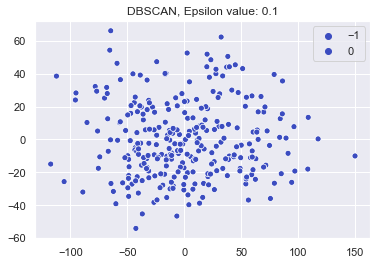

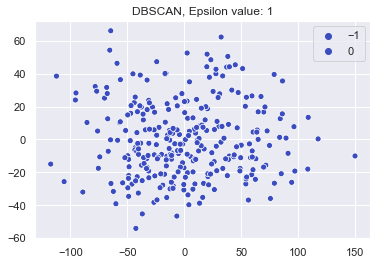

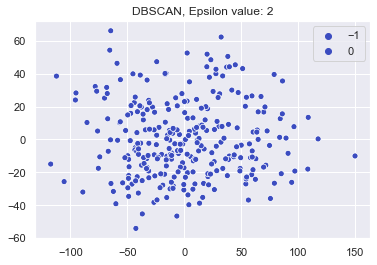

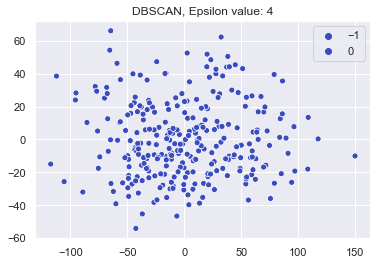

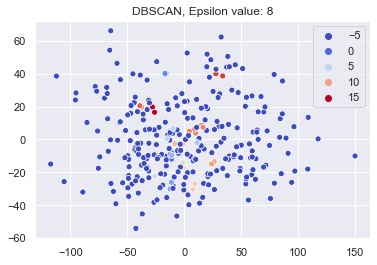

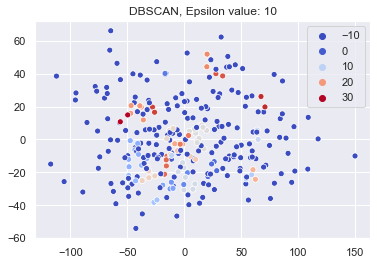

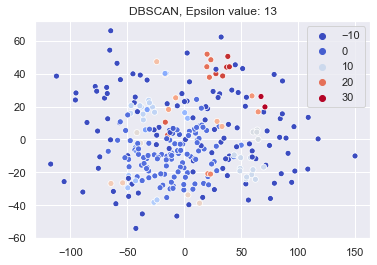

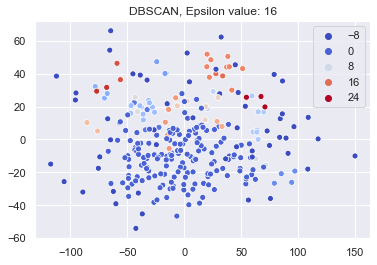

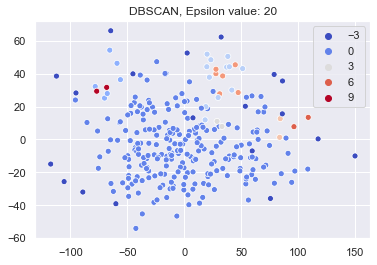

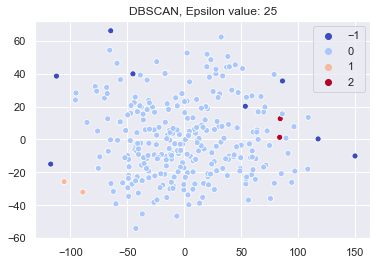

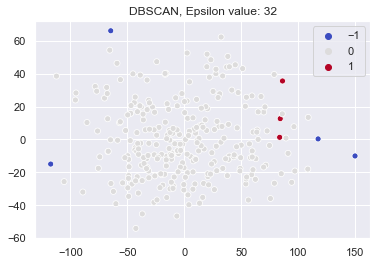

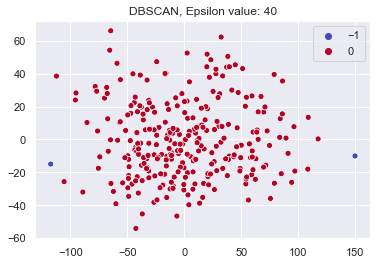

In [153]:
epsilons = [0.1, 1, 2, 4, 8, 10, 13, 16, 20, 25, 32, 40]

for epsilon in epsilons:
    db = DBSCAN(eps=epsilon, min_samples = 1.5)
    db.fit(dataset)
    
    sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=db.labels_, palette="coolwarm")
    plt.title("DBSCAN, Epsilon value: " + str(epsilon))
    plt.show()